<a href="https://colab.research.google.com/github/sujalgawas/DevLegacy_notebook/blob/main/DevLeagcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
from huggingface_hub import notebook_login
notebook_login()
"""

In [ ]:
"""
from datasets import load_dataset
import os

languages = [
    "python", "javascript", "java", "c", "c++",
    "go", "typescript", "php", "c-sharp", "rust",
    "sql","dockerfile", "kotlin","html","css","lua"
]

MAX_SAMPLES_PER_LANG = 30000

datasets_by_lang = {}

for lang in languages:
    print(f"--- Processing {lang} ---")

    ds = load_dataset(
        "bigcode/the-stack",
        data_dir=f"data/{lang}",
        split="train",
        streaming=True,
        token=True,
    )

    limited_generator = ds.take(MAX_SAMPLES_PER_LANG)

    datasets_by_lang[lang] = list(limited_generator)

    print(f"✅ Loaded {len(datasets_by_lang[lang])} samples for {lang}")

print("\nDone! All data loaded into memory.")
"""

--- Processing python ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/206 [00:00<?, ?it/s]

✅ Loaded 30000 samples for python
--- Processing javascript ---


Resolving data files:   0%|          | 0/499 [00:00<?, ?it/s]

✅ Loaded 30000 samples for javascript
--- Processing java ---


Resolving data files:   0%|          | 0/285 [00:00<?, ?it/s]

✅ Loaded 30000 samples for java
--- Processing c ---


Resolving data files:   0%|          | 0/257 [00:00<?, ?it/s]

✅ Loaded 30000 samples for c
--- Processing c++ ---


Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

✅ Loaded 30000 samples for c++
--- Processing go ---


Resolving data files:   0%|          | 0/115 [00:00<?, ?it/s]

✅ Loaded 30000 samples for go
--- Processing typescript ---


Resolving data files:   0%|          | 0/139 [00:00<?, ?it/s]

✅ Loaded 30000 samples for typescript
--- Processing php ---


Resolving data files:   0%|          | 0/198 [00:00<?, ?it/s]

✅ Loaded 30000 samples for php
--- Processing c-sharp ---


Resolving data files:   0%|          | 0/142 [00:00<?, ?it/s]

✅ Loaded 30000 samples for c-sharp
--- Processing rust ---


Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

✅ Loaded 30000 samples for rust
--- Processing sql ---


Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

✅ Loaded 30000 samples for sql
--- Processing dockerfile ---
✅ Loaded 30000 samples for dockerfile
--- Processing kotlin ---
✅ Loaded 30000 samples for kotlin
--- Processing html ---


Resolving data files:   0%|          | 0/802 [00:00<?, ?it/s]

✅ Loaded 30000 samples for html
--- Processing css ---


Resolving data files:   0%|          | 0/147 [00:00<?, ?it/s]

✅ Loaded 30000 samples for css
--- Processing lua ---
✅ Loaded 30000 samples for lua

Done! All data loaded into memory.


In [ ]:
"""
import pandas as pd

all_samples = []

for lang, samples in datasets_by_lang.items():
    for sample in samples:
        sample['language_source'] = lang
        all_samples.append(sample)

df = pd.DataFrame(all_samples)

print(f"✅ DataFrame created with {len(df)} rows.")
print(df.head())
"""

✅ DataFrame created with 480000 rows.
                                     hexsha   size ext    lang  \
0  f70001f658d4dfaa72dd4f0d1b3176492f6658bb   6442  py  Python   
1  f7000273e22d5a0f2d5b40c38a0ed8511d1b8995   2250  py  Python   
2  f70002926d1d600b4b068459c9dd40ebf3aef47d    757  py  Python   
3  f7000327daf9ff11a381ce6d5de401ff007d1323   1094  py  Python   
4  f7000371f0315cd55c0b14b33e7e8e56697cfc2e  10498  py  Python   

                 max_stars_repo_path   max_stars_repo_name  \
0                  spider/openwrt.py             CNDB/CNDB   
1                   utils/compare.py           adcrn/knest   
2         sdk/python/kfp/__main__.py  ConverJens/pipelines   
3   TestProject/app/view/RoomItem.py   ChinSing00/ChatChat   
4  src/winforms/toga_winforms/app.py             holg/toga   

                 max_stars_repo_head_hexsha max_stars_repo_licenses  \
0  2e3a41111f604cf2f4f22a7c9370bb3f753e3e88          [BSD-3-Clause]   
1  a274dc9ddb642cc30f837e225f000bf33430eb43       

In [ ]:
"""
senior_level_df = df.loc[df['max_stars_count'] < 100]
senior_level_df.shape
SL_cleaned = senior_level_df[['lang','content','size','avg_line_length']]
SL_cleaned["score"] = 1
SL_cleaned.shape
df.to_csv('SL_codes.csv', index=False)
"""

(199590, 30)

In [ ]:
"""
SL_df = SL_df.loc[SL_df['max_stars_count'] > 1000]
SL_df.shape

SL_df = SL_df[['lang','content','size','avg_line_length']]

languages = SL_df["lang"].unique()

final_df = pd.DataFrame(['lang','content','size','avg_line_length'])

final_df = (
    SL_df[SL_df["lang"].isin(languages)]
    .groupby("lang", group_keys=False)
    .head(100)
    .reset_index(drop=True)
)

final_df.to_csv("SL_code_cleaned.csv")
"""

In [ ]:
"""
languages = test["lang"].unique()

test = test[['lang','content','size','avg_line_length']]

test.to_csv("SL_final_10k.csv")

test = test.reset_index(drop=True)

for x in range(12):
    current_batch = test[test["lang"].isin(languages)].groupby("lang", group_keys=False).head(100)

    current_batch.reset_index(drop=True).to_csv(f"data_{x}.csv", index=False)

    test = test.drop(current_batch.index)

    print(f"Batch {x} shape: {current_batch.shape}")

    test = SL_df.loc[SL_df["max_stars_count"] > 1000]
    """

Batch 0 shape: (1600, 5)
Batch 1 shape: (1600, 5)
Batch 2 shape: (1508, 5)
Batch 3 shape: (1454, 5)
Batch 4 shape: (1207, 5)
Batch 5 shape: (1157, 5)
Batch 6 shape: (1100, 5)
Batch 7 shape: (951, 5)
Batch 8 shape: (899, 5)
Batch 9 shape: (548, 5)
Batch 10 shape: (346, 5)
Batch 11 shape: (298, 5)


In [ ]:
!pip install lightning peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.6/853.6 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 39.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

JL_file_path = '/content/drive/MyDrive/codedata/junior final/JL_final_df(14400).csv'
SL_file_path = '/content/drive/MyDrive/codedata/SL_final_10k.csv'


SL_df = pd.read_csv(SL_file_path)
JL_df = pd.read_csv(JL_file_path)

In [ ]:
final_df = pd.concat([SL_df,JL_df])

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import lightning.pytorch as pl
from lightning.pytorch import LightningDataModule, LightningModule, Trainer
from sklearn.model_selection import train_test_split
from torch import optim
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer
from peft import LoraConfig, get_peft_model

class codedataset(Dataset):
    def __init__(self, code_df, tokenizer):
        self.code_df = code_df
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.code_df)

    def __getitem__(self, idx):
        row = self.code_df.iloc[idx]
        lang = row['lang']
        content = row['content']
        score = row['score']

        content_token = self.tokenizer(content, return_tensors='pt', truncation=True, padding='max_length', max_length=512)

        inputs = content_token['input_ids'].squeeze(0)
        attention_mask = content_token['attention_mask'].squeeze(0)

        return inputs, attention_mask, torch.tensor(score, dtype=torch.float)

In [ ]:
class codeModule(LightningDataModule):
    def __init__(self, train_dataset, valid_dataset, batch_size=8, num_workers=2):
        super().__init__()
        self.train_dataset = train_dataset
        self.valid_dataset = valid_dataset
        self.batch_size = batch_size
        self.num_workers = num_workers

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.valid_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

In [ ]:
model_name = "microsoft/codebert-base"

base_model = AutoModel.from_pretrained(model_name)

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    task_type="FEATURE_EXTRACTION"
)

peft_model = get_peft_model(base_model, lora_config)
peft_model.print_trainable_parameters()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

trainable params: 294,912 || all params: 124,940,544 || trainable%: 0.2360


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
import numpy as np

class CodeExperienceModel(pl.LightningModule):
    def __init__(self, model, lr=1e-4):
        super().__init__()
        self.save_hyperparameters(ignore=['model'])
        self.model = model
        self.lr = lr

        self.regressor = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

        self.loss_fn = nn.MSELoss()

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        pooler_output = outputs.pooler_output
        return self.regressor(pooler_output)

    def training_step(self, batch, batch_idx):
        input_ids, attention_mask, labels = batch
        labels = labels.float().unsqueeze(1)

        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = outputs.pooler_output

        if np.random.random() > 0.5:
            lam = np.random.beta(1.0, 1.0)
            index = torch.randperm(embeddings.size(0)).to(self.device)

            mixed_embeddings = lam * embeddings + (1 - lam) * embeddings[index]
            mixed_labels = lam * labels + (1 - lam) * labels[index]

            preds = self.regressor(mixed_embeddings)
            loss = self.loss_fn(preds, mixed_labels)
        else:
            preds = self.regressor(embeddings)
            loss = self.loss_fn(preds, labels)

        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids, attention_mask, labels = batch
        labels = labels.float().unsqueeze(1)

        preds = self(input_ids, attention_mask)
        loss = self.loss_fn(preds, labels)

        self.log("val_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return optim.AdamW(self.parameters(), lr=self.lr)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

if 'final_df' in locals():
    full_dataset = codedataset(final_df, tokenizer)

    train_ds, valid_ds = train_test_split(full_dataset, test_size=0.3, shuffle=True, random_state=42)

    datamodule = codeModule(train_dataset=train_ds, valid_dataset=valid_ds, batch_size=4, num_workers=2)

    lightning_model = CodeExperienceModel(peft_model)

    trainer = Trainer(max_epochs=1, accelerator="auto", devices="auto", logger=True)

    trainer.fit(lightning_model, datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name       ┃ Type                          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model      │ PeftModelForFeatureExtraction │  124 M │ eval  │     0 │
│ 1 │ sequential │ Sequential                    │  205 K │ train │     0 │
│ 2 │ regressor  │ Linear                        │    769 │ train │     0 │
│ 3 │ sigmoid    │ Sigmoid                       │      0 │ train │     0 │
│ 4 │ loss_fn    │ MSELoss                       │      0 │ train │     0 │
└───┴────────────┴───────────────────────────────┴────────┴───────┴───────┘

Trainable params: 500 K                                                                                            
Non-trainable params: 124 M                                                                                        
Total params: 125 M                                                                                                
Total estimated model params size (MB): 500                                                                        
Modules in train mode: 8                                                                                           
Modules in eval mode: 470                                                                                          
Total FLOPs: 0

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:534: Found 470 module(s) in eval mode 
at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can 
ignore this warning.

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size 
(torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results 
due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


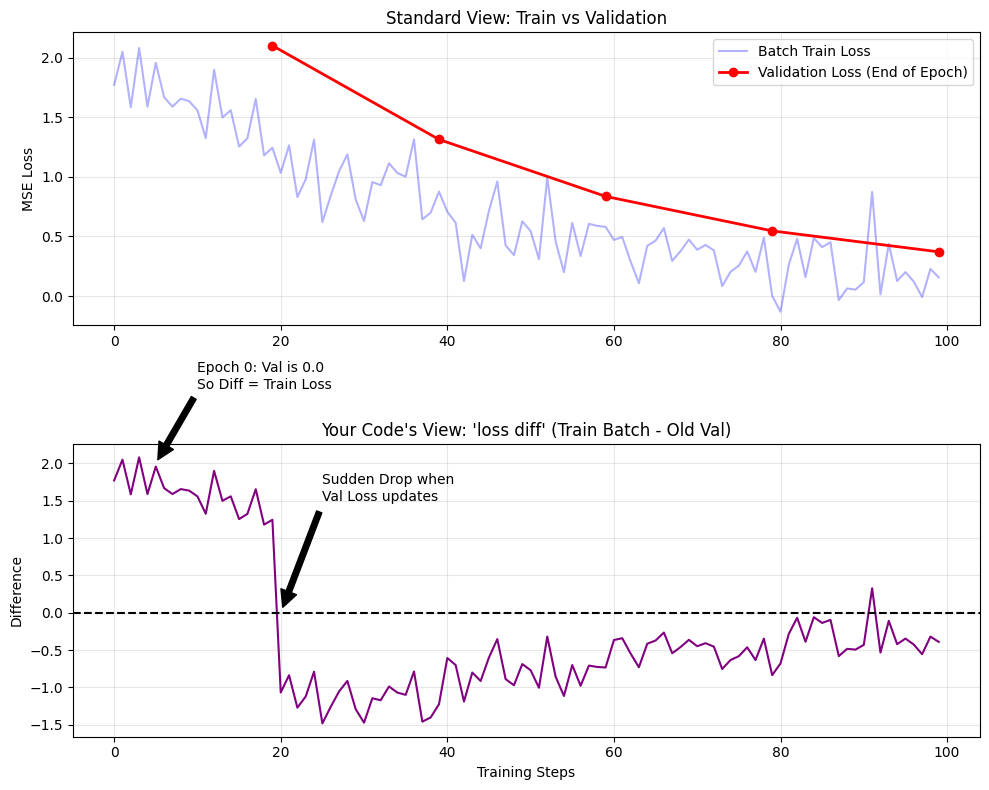

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Simulation Settings ---
epochs = 5
batches_per_epoch = 20
total_steps = epochs * batches_per_epoch

# Generate simulated "True" Training Loss (Noisy and decreasing)
x = np.linspace(0, epochs, total_steps)
true_trend = 2.0 * np.exp(-0.5 * x)  # Underlying improvement
noise = np.random.normal(0, 0.2, total_steps)  # Batch-to-batch noise
train_losses = true_trend + noise

# Generate simulated Validation Loss (Calculated only at end of epoch)
# Val loss usually lags slightly behind train loss and is smoother
val_losses_per_epoch = [2.0 * np.exp(-0.5 * i) + 0.1 for i in range(epochs)]

# --- Your Logic Simulation ---
logged_diffs = []
current_val_loss_in_callback = 0.0  # Starts at 0.0 as per your code

step_indices = []

for step in range(total_steps):
    epoch_idx = step // batches_per_epoch

    # 1. Get current batch loss
    current_train_loss = train_losses[step]

    # 2. Your specific logic: loss - val_loss
    # Note: 'current_val_loss_in_callback' is old (from previous epoch)
    diff = current_train_loss - current_val_loss_in_callback
    logged_diffs.append(diff)

    # 3. End of Epoch Update (Lightning updates callback metrics here)
    if (step + 1) % batches_per_epoch == 0:
        current_val_loss_in_callback = val_losses_per_epoch[epoch_idx]

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: The Reality (What you usually want to see)
ax1.plot(train_losses, label='Batch Train Loss', color='blue', alpha=0.3)
ax1.plot(np.arange(batches_per_epoch, total_steps + 1, batches_per_epoch) - 1,
         val_losses_per_epoch,
         label='Validation Loss (End of Epoch)',
         color='red', marker='o', linewidth=2)
ax1.set_title("Standard View: Train vs Validation")
ax1.set_ylabel("MSE Loss")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Your 'loss diff' Logic
ax2.plot(logged_diffs, color='purple')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_title("Your Code's View: 'loss diff' (Train Batch - Old Val)")
ax2.set_ylabel("Difference")
ax2.set_xlabel("Training Steps")
ax2.annotate('Epoch 0: Val is 0.0\nSo Diff = Train Loss', xy=(5, 2.0), xytext=(10, 3.0),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('Sudden Drop when\nVal Loss updates', xy=(20, 0), xytext=(25, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# --- Evaluation ---
lightning_model.eval()
text = """public class AverageCalculator {

    def main(args):
        int sum = 0;
        for (i in range(0, len(args))) {
            sum += args[i];
        }

        console.log("Average = " + (sum / args.length));

        return sum / args.length;
}
"""

inputs = tokenizer(
    text,
    return_tensors='pt',
    truncation=True,
    padding='max_length',
    max_length=512
)

with torch.no_grad():
    input_ids = inputs['input_ids'].to(lightning_model.device)
    attention_mask = inputs['attention_mask'].to(lightning_model.device)

    output = lightning_model(input_ids, attention_mask)

    print(f"Predicted Score: {output.item()}")

Predicted Score: 0.9925830364227295
